In [1]:
cd E:\study\MBA-652 SMBA

[WinError 21] The device is not ready: 'E:\\study\\MBA-652 SMBA'
C:\Users\Saurabh\Desktop\SEM 2\MBA652A SMBA\Project


In [2]:
#import libraries
import pandas as pd
import numpy as np

#importing liabraries for graphical representation
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import matplotlib.patches as mpatches
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline

## Importing the Data set in a dataframe - travel

In [3]:
#import data
travel=pd.read_csv("travel insurance.csv")
travel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


In [4]:
travel.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


## Basic Data Hygiene Check

In [5]:
# Checking the distribution of the claims

(travel.groupby('Claim').size()/travel.shape[0]).round(4)

Claim
No     0.9854
Yes    0.0146
dtype: float64

Text(0.5, 1.0, 'Count of each Target Class')

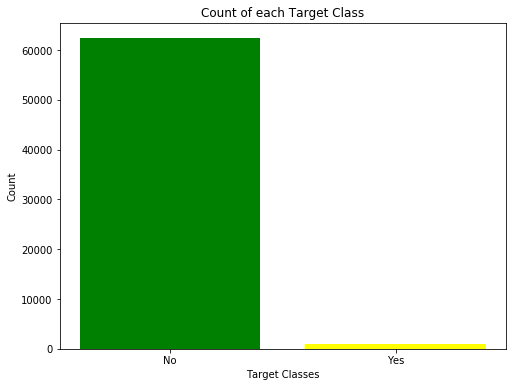

In [6]:
rcParams['figure.figsize'] = 8,6
plt.bar(travel['Claim'].unique(), travel['Claim'].value_counts(), color = ['green', 'yellow'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [7]:
# checking for the null values.

travel.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

In [8]:
# Checking the weightage of null values.

(travel['Gender'].isnull().sum()/travel.shape[0]*100).round(2)

71.23

In [9]:
# Check for unique Value in the DataFrame.

travel.nunique()

Agency                    16
Agency Type                2
Distribution Channel       2
Product Name              26
Claim                      2
Duration                 455
Destination              149
Net Sales               1139
Commision (in value)    1035
Gender                     2
Age                       89
dtype: int64

In [10]:
travel["Agency"].value_counts(dropna=False)

EPX    35119
CWT     8580
C2B     8267
JZI     6329
SSI     1056
JWT      749
RAB      725
LWC      689
TST      528
KML      392
ART      331
CCR      194
CBH      101
TTW       98
CSR       86
ADM       82
Name: Agency, dtype: int64

In [11]:
travel["Agency Type"].value_counts(dropna=False)

Travel Agency    45869
Airlines         17457
Name: Agency Type, dtype: int64

In [12]:
travel["Distribution Channel"].value_counts(dropna=False)

Online     62219
Offline     1107
Name: Distribution Channel, dtype: int64

In [13]:
travel["Product Name"].value_counts(dropna=False)

Cancellation Plan                       18630
2 way Comprehensive Plan                13158
Rental Vehicle Excess Insurance          8580
Basic Plan                               5469
Bronze Plan                              4049
1 way Comprehensive Plan                 3331
Value Plan                               2715
Silver Plan                              2249
Annual Silver Plan                       1423
Ticket Protector                         1056
Travel Cruise Protect                     527
Comprehensive Plan                        364
Gold Plan                                 352
24 Protect                                247
Single Trip Travel Protect Gold           204
Annual Gold Plan                          194
Premier Plan                              194
Single Trip Travel Protect Silver         173
Annual Travel Protect Gold                100
Annual Travel Protect Silver               86
Individual Comprehensive Plan              74
Single Trip Travel Protect Platinu

In [14]:
travel["Destination"].value_counts(dropna=False)

SINGAPORE                                 13255
MALAYSIA                                   5930
THAILAND                                   5894
CHINA                                      4796
AUSTRALIA                                  3694
                                          ...  
GUATEMALA                                     1
BOTSWANA                                      1
BARBADOS                                      1
GUINEA-BISSAU                                 1
KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF        1
Name: Destination, Length: 149, dtype: int64

In [15]:
# Check for the maximum and minimum values to see if there are any invalid.

travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.317074,40.702018,9.809992,39.969981
std,101.791566,48.845637,19.804388,14.017010
min,-2.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [16]:
# Calculate % of negative Duration Travels

(travel['Duration'] < 0).sum()/travel.shape[0]*100

0.007895651075387677

In [17]:
(travel['Duration'] > 731).sum()/travel.shape[0]*100

0.02368695322616303

In [18]:
# Now check the weightage of Age
(travel['Age'] > 99).sum()/travel.shape[0]*100

1.5538641316362947

In [19]:
# define a function to make age groups as children, adults and senior

def age_convert(age):
    result = ''
    if(age <= 21):
        result = 'Child'
    elif(age <= 50):
        result = 'Adult'
    else:
        result = 'Senior'
    return result

In [20]:
# Write a function for data preprocessing

def data_pre_processing(df):
    # Add a new column in the Database as Age Group

    df['Age Group'] = df['Age'].map(lambda x: age_convert(x))

    # Dropping Feature Gender
    df.drop('Gender',axis =1, inplace=True)
    
    # Since the minimum duration that any travel can have is 1 day thus we impute it by the column median.
    df['Duration'][df['Duration'] < 0] = df['Duration'].median()

    # As we observed duration of any travel cannot be more than 731 we will impute it as 731.
    df['Duration'][df['Duration'] > 731] = 731
    
    # replacing the values that is greater than 99 with the mean of Senior Age
    df['Age'][df['Age'] > 99] = df[df['Age Group'] == 'Senior']['Age'].mean()

In [21]:
data_pre_processing(travel)

C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
C:\Users\Saurabh\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [22]:
travel.describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,48.427281,40.702018,9.809992,39.158661
std,74.485447,48.845637,19.804388,10.562380
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,11.550000,43.000000
max,731.000000,810.000000,283.500000,88.000000


In [23]:
# Creating a dataframe dropping the features with datatype Object

travel_plot = travel.drop(['Agency','Agency Type','Destination','Distribution Channel','Product Name','Claim'], axis = 1)

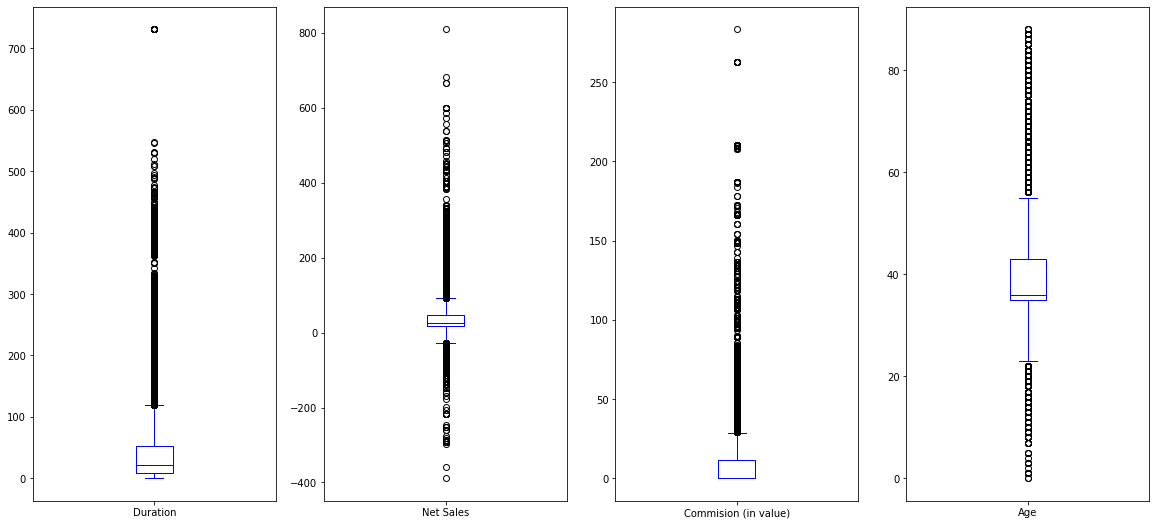

In [24]:
# box and whisker plots

travel_plot.plot(kind='box', subplots=True, layout=(2,4), sharex=False, sharey=False, figsize=(20,20),color='blue')
plt.show()

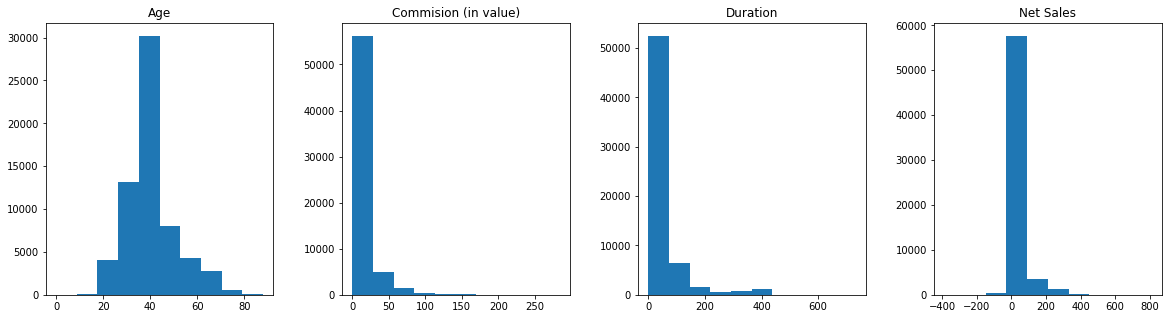

In [25]:
travel_plot.hist(grid=False,sharex=False,sharey=False,figsize=(20,5),layout=(1,4))
plt.show()

In [26]:
table1=pd.crosstab(travel['Agency'],travel['Claim'],margins=True)

table1.drop(index=['All'],inplace=True)
table1=(table1.div(table1['All'],axis=0))*100

table1['mean commision']=travel.groupby('Agency')['Commision (in value)'].mean()
table1

Claim,No,Yes,All,mean commision
Agency,,,,
ADM,100.000000,0.000000,100.0,38.254878
ART,99.697885,0.302115,100.0,10.553927
C2B,93.383331,6.616669,100.0,20.533124
CBH,99.009901,0.990099,100.0,10.030693
CCR,98.453608,1.546392,100.0,10.313351
CSR,98.837209,1.162791,100.0,10.824767
CWT,98.997669,1.002331,100.0,32.380615
EPX,99.444745,0.555255,100.0,0.000000
JWT,99.465955,0.534045,100.0,21.640053


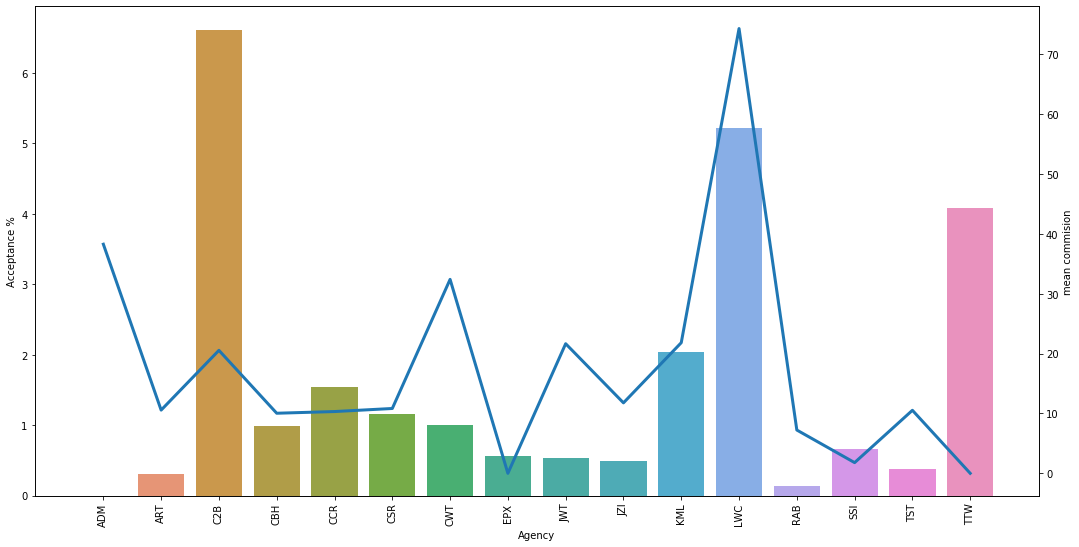

In [27]:
fig,ax1=plt.subplots(figsize=(18,9))
sns.barplot(table1.index,table1.Yes,ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table1.index,table1['mean commision'],ax=ax2,linewidth=3)

In [28]:
netsales_mean = (travel.groupby('Agency', as_index=False)['Net Sales'].mean()).nlargest(10,'Net Sales')
netsales_mean

,Agency,Net Sales
11,LWC,111.510813
15,TTW,93.204082
2,C2B,78.865811
10,KML,55.448980
0,ADM,53.256098
8,JWT,53.012016
6,CWT,43.040769
5,CSR,32.802326
7,EPX,32.564993
9,JZI,32.338442


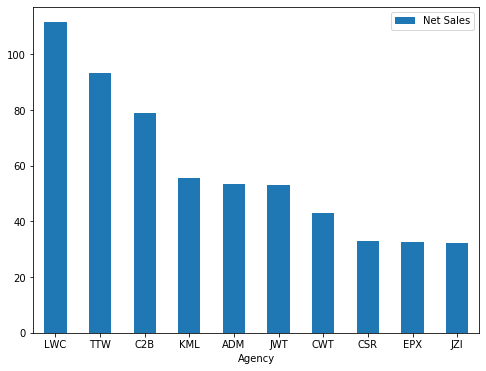

In [29]:
ax1 = netsales_mean.plot.bar(x='Agency', y='Net Sales', rot=0)

In [30]:
table2=pd.crosstab(travel['Product Name'],travel['Claim'],margins=True)
table2=(table2.div(table2['All'],axis=0))*100

table2['mean commision']=travel.groupby('Product Name')['Commision (in value)'].mean()
table2.drop(index=['All'],inplace=True)
table2

Claim,No,Yes,All,mean commision
Product Name,,,,
1 way Comprehensive Plan,99.729811,0.270189,100.0,0.000000
2 way Comprehensive Plan,98.920809,1.079191,100.0,0.000000
24 Protect,100.000000,0.000000,100.0,8.511943
Annual Gold Plan,89.175258,10.824742,100.0,88.920619
Annual Silver Plan,88.966971,11.033029,100.0,56.985200
Annual Travel Protect Gold,90.000000,10.000000,100.0,161.536200
Annual Travel Protect Platinum,94.339623,5.660377,100.0,215.935849
Annual Travel Protect Silver,95.348837,4.651163,100.0,136.168837
Basic Plan,99.579448,0.420552,100.0,9.537676


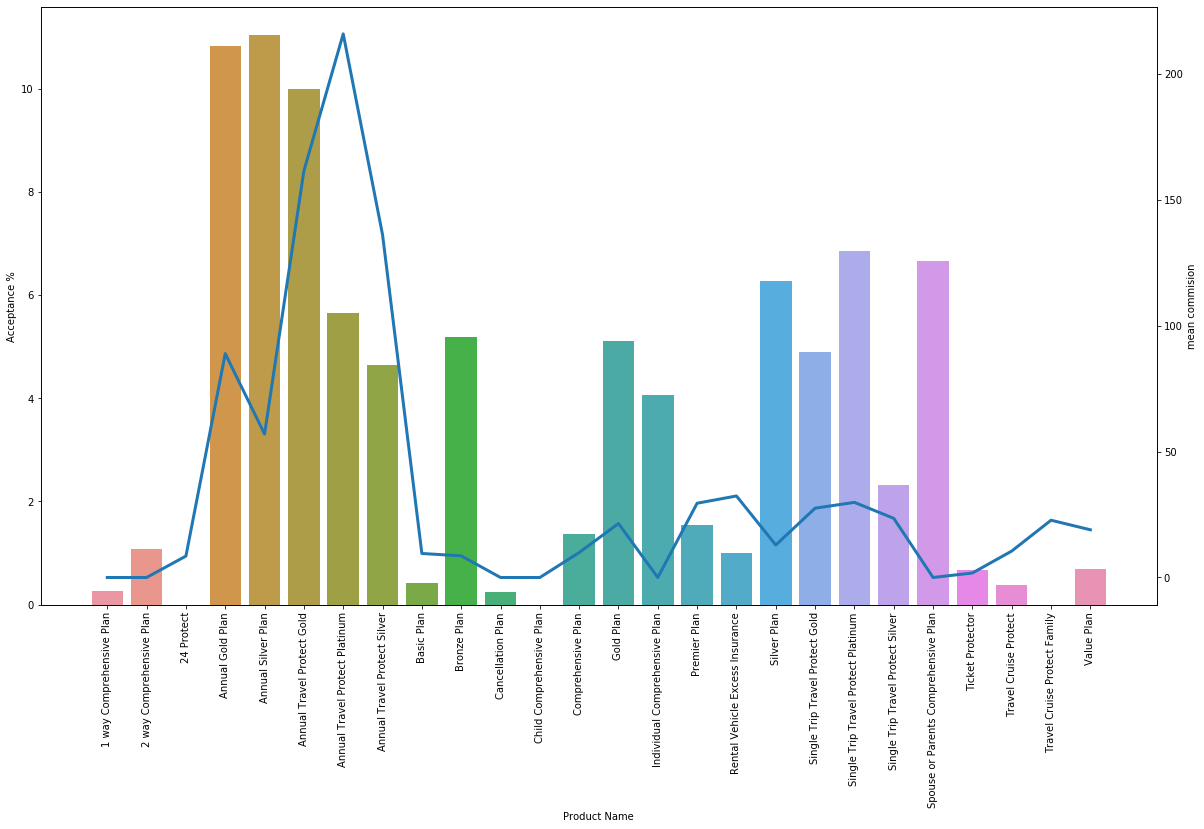

In [31]:
fig,ax1=plt.subplots(figsize=(20,11))
sns.barplot(table2.index,table2.Yes,ax=ax1)
plt.xticks(rotation=90)
ax1.set(ylabel='Acceptance %')
ax2=ax1.twinx()
sns.lineplot(table2.index,table2['mean commision'],ax=ax2,linewidth=3)

Agency     
Claim             No  Yes
Agency Type              
Airlines       16866  591
Travel Agency  45533  336

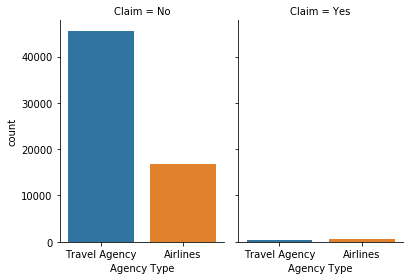

In [32]:
plot2 = sns.catplot(x="Agency Type", col="Claim",data=travel, kind="count",height=4, aspect=.7)
travel.pivot_table(index=['Agency Type'],columns=['Claim'], values=['Agency'], aggfunc='count')

In [33]:
travel.pivot_table(index = ['Product Name'], values = ['Net Sales'], aggfunc = 'mean')

,Net Sales
Product Name,
1 way Comprehensive Plan,27.663464
2 way Comprehensive Plan,42.511704
24 Protect,22.772955
Annual Gold Plan,336.602320
Annual Silver Plan,218.851307
Annual Travel Protect Gold,246.940500
Annual Travel Protect Platinum,332.209434
Annual Travel Protect Silver,200.596512
Basic Plan,26.495337


In [34]:
travel.pivot_table(index = ['Age Group'], values = ['Net Sales'], aggfunc = 'count')

,Net Sales
Age Group,
Adult,53563
Child,778
Senior,8985


In [35]:
travel.groupby('Age Group')['Claim'].value_counts()

Age Group  Claim
Adult      No       52791
           Yes        772
Child      No         761
           Yes         17
Senior     No        8847
           Yes        138
Name: Claim, dtype: int64

<Figure size 288x288 with 0 Axes>

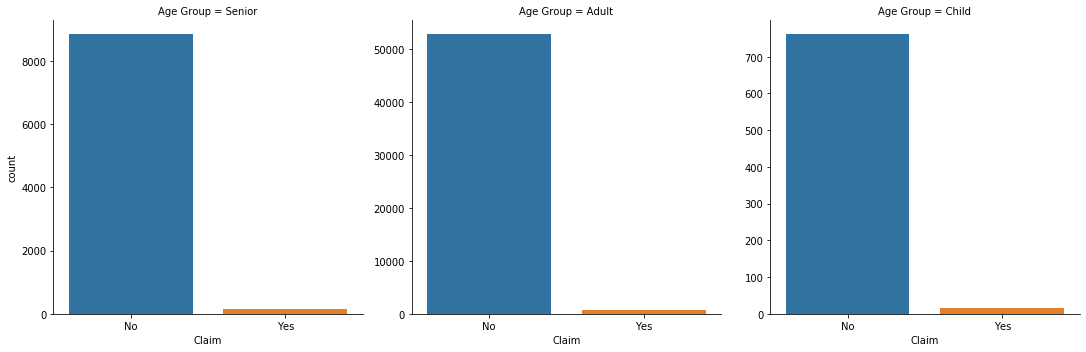

In [36]:
fig = plt.figure(figsize = (4,4))
sns.catplot('Claim', col = 'Age Group', data = travel, col_wrap =3, kind='count',sharey=False)

In [37]:
# label encoding the data 
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
travel['Agency']= le.fit_transform(travel['Agency']) 
travel['Agency Type']= le.fit_transform(travel['Agency Type']) 
travel['Distribution Channel']= le.fit_transform(travel['Distribution Channel']) 
travel['Product Name']= le.fit_transform(travel['Product Name']) 
travel['Age Group']= le.fit_transform(travel['Age Group'])
travel['Claim']= le.fit_transform(travel['Claim'])

In [38]:
travel.corr()['Claim'].sort_values()

Agency                 -0.121685
Agency Type            -0.098706
Age                    -0.012551
Distribution Channel   -0.000798
Product Name            0.000679
Age Group               0.003478
Commision (in value)    0.098696
Duration                0.102046
Net Sales               0.133931
Claim                   1.000000
Name: Claim, dtype: float64

In [39]:
X = travel.drop('Claim', axis = 1)
Y = travel['Claim']

In [40]:
# Multi colinearity detection
def plot_heatmap(df, fig_size=(10, 7)):
    fig = plt.figure(figsize=fig_size)
    sns.heatmap(df.corr(), annot=True)
    plt.title('Heatmap for detecting multicollinearity', fontsize=16, color='navy')
    plt.show()

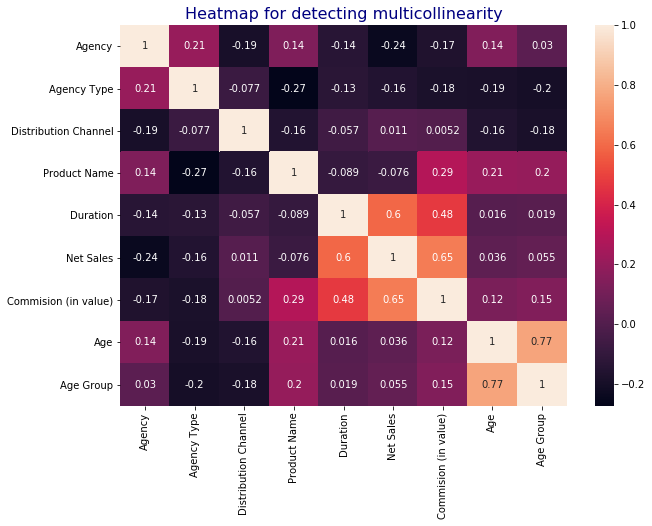

In [41]:
plot_heatmap(X)

In [42]:
travel["Claim"].value_counts()

0    62399
1      927
Name: Claim, dtype: int64

In [43]:
dataset_maj = travel[travel["Claim"]==0]
dataset_min = travel[travel["Claim"]==1]

In [44]:
from sklearn.utils import resample
dataset_min_oversample = resample(dataset_min, 
                                 replace=True,     # sample with replacement
                                 n_samples=12000,    # to match majority class
                                 random_state=123)

In [45]:
dataset_oversampled = pd.concat([dataset_maj, dataset_min_oversample])
dataset_oversampled = dataset_oversampled.reset_index(drop=True)

In [46]:
dataset_oversampled["Claim"].value_counts()

0    62399
1    12000
Name: Claim, dtype: int64

In [47]:
dataset_oversampled.head

<bound method NDFrame.head of        Agency  Agency Type  Distribution Channel  Product Name  Claim  \
0           3            1                     0            12      0   
1           3            1                     0            12      0   
2           6            1                     1            16      0   
3           6            1                     1            16      0   
4           6            1                     1            16      0   
...       ...          ...                   ...           ...    ...   
74394       7            1                     1             1      1   
74395       6            1                     1            16      1   
74396       2            0                     1             9      1   
74397       7            1                     1             1      1   
74398      12            0                     1            25      1   

       Duration        Destination  Net Sales  Commision (in value)   Age  \
0           186 

In [48]:
# Dropping Feature Gender
dataset_oversampled.drop('Age',axis =1, inplace=True)

In [49]:
columns = ['Agency','Agency Type','Distribution Channel','Product Name','Duration','Net Sales','Commision (in value)','Age Group','Claim']
dataset_oversampled = dataset_oversampled.reindex(columns=columns)
dataset_oversampled.head()

,Agency,Agency Type,Distribution Channel,Product Name,Duration,Net Sales,Commision (in value),Age Group,Claim
0,3,1,0,12,186,-29.0,9.57,2,0
1,3,1,0,12,186,-29.0,9.57,2,0
2,6,1,1,16,65,-49.5,29.70,0,0
3,6,1,1,16,60,-39.6,23.76,0,0
4,6,1,1,16,79,-19.8,11.88,0,0


In [50]:
X = dataset_oversampled[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Net Sales','Commision (in value)','Age Group']]
Y = dataset_oversampled["Claim"]

In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [52]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Distribution Channel,9.64
0,Agency,8.08
5,Net Sales,5.45
3,Product Name,4.00
1,Agency Type,3.97
6,Commision (in value),3.51
4,Duration,3.06
7,Age Group,1.25


In [53]:
import statsmodels.api as sm
X = dataset_oversampled[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Net Sales','Commision (in value)','Age Group']]
Y = dataset_oversampled["Claim"]
X = sm.add_constant(X)

Probit = sm.Probit(endog=Y, exog = X)

result = Probit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.360081
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  Claim   No. Observations:                74399
Model:                         Probit   Df Residuals:                    74390
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.1850
Time:                        15:08:13   Log-Likelihood:                -26790.
converged:                       True   LL-Null:                       -32870.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4678      0.054      8.679      0.000       0.362       0.573
Agency                  -0.1131      0.003    -43.228      0.000      -0.118      -0.108
Agency Type             -0.4738      0.016    -29.910      0.000      -0.505      -0.443
Distribution Channel    -0.7550      0.046    -16.396      0.000      -0.845      -0.665
Product Name            -0.0011      0.001     -0.939      0.348      -0.003       0.001
Duration                -0.0004   9.76e-05     -4.213      0.000      -0.001      -0.000
Net Sales                0.0039      0.000     21.030      0.000       0.004       0.004
Commision (in value)     0.0033      0.000      7.849      0.000       0.002       0.004
Age Group               -0.0802      0.009     -9.021      0.000      -0.098      -0.063
========================================================================================
"""

In [54]:
X = dataset_oversampled[['Agency','Agency Type','Distribution Channel','Product Name','Duration','Net Sales','Commision (in value)','Age Group']]
Y = dataset_oversampled["Claim"]
X = sm.add_constant(X)

logit = sm.Logit(endog=Y, exog = X)

result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.360034
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Claim   No. Observations:                74399
Model:                          Logit   Df Residuals:                    74390
Method:                           MLE   Df Model:                            8
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.1851
Time:                        15:08:14   Log-Likelihood:                -26786.
converged:                       True   LL-Null:                       -32870.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.9276      0.097      9.541      0.000       0.737       1.118
Agency                  -0.2082      0.005    -41.885      0.000      -0.218      -0.198
Agency Type             -0.8496      0.030    -28.393      0.000      -0.908      -0.791
Distribution Channel    -1.2930      0.085    -15.164      0.000      -1.460      -1.126
Product Name            -0.0039      0.002     -1.731      0.083      -0.008       0.001
Duration                -0.0013      0.000     -6.837      0.000      -0.002      -0.001
Net Sales                0.0067      0.000     19.025      0.000       0.006       0.007
Commision (in value)     0.0070      0.001      9.077      0.000       0.005       0.009
Age Group               -0.1415      0.016     -8.719      0.000      -0.173      -0.110
========================================================================================
"""

In [55]:
X_1 = dataset_oversampled[['Agency','Agency Type','Distribution Channel','Duration','Net Sales','Commision (in value)','Age Group']]
Y_1= dataset_oversampled["Claim"]
X_1= sm.add_constant(X_1)

probit = sm.Probit(endog=Y_1, exog = X_1)

result = probit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.360087
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                          Probit Regression Results                           
==============================================================================
Dep. Variable:                  Claim   No. Observations:                74399
Model:                         Probit   Df Residuals:                    74391
Method:                           MLE   Df Model:                            7
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.1850
Time:                        15:08:14   Log-Likelihood:                -26790.
converged:                       True   LL-Null:                       -32870.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.4482      0.050      9.027      0.000       0.351       0.545
Agency                  -0.1134      0.003    -43.573      0.000      -0.118      -0.108
Agency Type             -0.4690      0.015    -31.292      0.000      -0.498      -0.440
Distribution Channel    -0.7483      0.045    -16.462      0.000      -0.837      -0.659
Duration                -0.0004   9.38e-05     -4.115      0.000      -0.001      -0.000
Net Sales                0.0039      0.000     22.030      0.000       0.004       0.004
Commision (in value)     0.0031      0.000      8.360      0.000       0.002       0.004
Age Group               -0.0808      0.009     -9.118      0.000      -0.098      -0.063
========================================================================================
"""

In [56]:
X_1 = dataset_oversampled[['Agency','Agency Type','Distribution Channel','Duration','Net Sales','Commision (in value)','Age Group']]
Y_1 = dataset_oversampled["Claim"]
X_1 = sm.add_constant(X_1)

logit = sm.Logit(endog=Y_1, exog = X_1)

result = logit.fit()

result.summary()

Optimization terminated successfully.
         Current function value: 0.360054
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Claim   No. Observations:                74399
Model:                          Logit   Df Residuals:                    74391
Method:                           MLE   Df Model:                            7
Date:                Sat, 13 Jun 2020   Pseudo R-squ.:                  0.1850
Time:                        15:08:15   Log-Likelihood:                -26788.
converged:                       True   LL-Null:                       -32870.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                    0.8626      0.090      9.627      0.000       0.687       1.038
Agency                  -0.2086      0.005    -42.122      0.000      -0.218      -0.199
Agency Type             -0.8346      0.029    -29.173      0.000      -0.891      -0.779
Distribution Channel    -1.2745      0.084    -15.088      0.000      -1.440      -1.109
Duration                -0.0012      0.000     -6.632      0.000      -0.002      -0.001
Net Sales                0.0068      0.000     19.853      0.000       0.006       0.008
Commision (in value)     0.0064      0.001      9.248      0.000       0.005       0.008
Age Group               -0.1441      0.016     -8.922      0.000      -0.176      -0.112
========================================================================================
"""

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


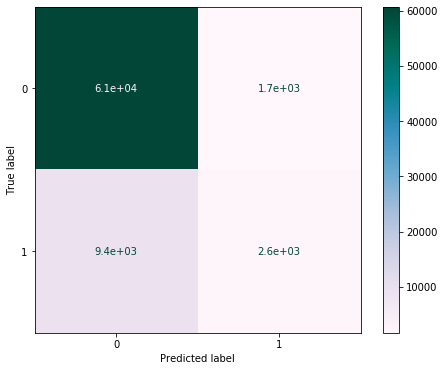

In [57]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X, Y)

y_pred = classifier.predict(X)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X, Y , cmap='PuBuGn')  # doctest: +SKIP
plt.show()

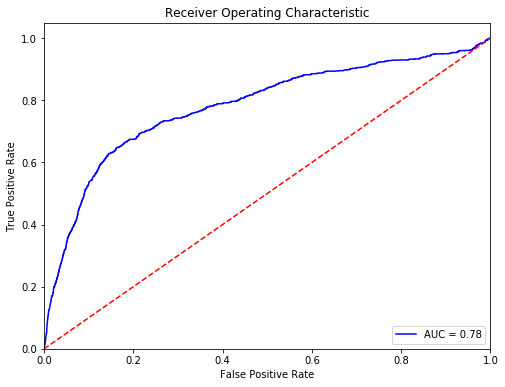

In [58]:
#ROC curve code
import sklearn.metrics as metrics

probs = classifier.predict_proba(X)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y, preds)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


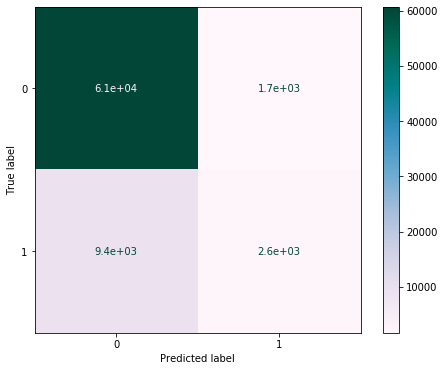

In [59]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_1, Y_1)

y_pred_1 = classifier.predict(X_1)

from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_1, Y_1, cmap='PuBuGn')  # doctest: +SKIP
plt.show()

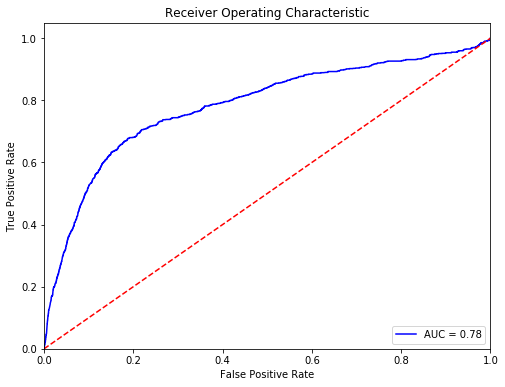

In [60]:
#ROC curve code
import sklearn.metrics as metrics

probs_1 = classifier.predict_proba(X_1)
preds_1 = probs_1[:,1]

fpr, tpr, threshold = metrics.roc_curve(Y_1, preds_1)
roc_auc = metrics.auc(fpr, tpr)


import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.4f' % roc_auc)
plt.legend(loc = 'lower right')

plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0.0, 1.05])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
from sklearn.metrics import f1_score
f1_score(Y, y_pred, average='weighted')

0.8196462542954248

In [62]:
from sklearn.metrics import f1_score
f1_score(Y_1, y_pred_1, average='weighted')

0.8198684099306207